In [1]:
%matplotlib inline

from IPython import display
import pylab as pl
from matplotlib.patches import Ellipse
from sklearn import datasets
import numpy as np
import matplotlib.pyplot
import matplotlib.pyplot as plt
import time
from sklearn import datasets
import random
import math

In [2]:
# bounds to generate our samples in, i.e., [-Bounds, Bounds]
Bounds = 5 # 100
# dimensionality of our space
Dim = 2
# what function to use?
WhichFx = 2
# how detailed to draw our fx?
ContourStepSize = 0.05 # 1

# what function are we optimizing? from https://en.wikipedia.org/wiki/Test_functions_for_optimization
def my_func(x, y):
    if(WhichFx==1):
        z = (x*x + y - 11)**2 + (x + y*y - 7)**2 # Himmelblau's function
    elif(WhichFx==2):    
        z = 10*2 + (x**2 - 10*np.cos(2*math.pi*x)) + (y**2 - 10*np.cos(2*math.pi*y)) # Rastrigin function
    elif(WhichFx==3):
        z = ((x**4 - 16*(x**2) + 5*x) + (y**4 - 16*(y**2) + 5*y)) / 2 # Styblinski–Tang function
    elif(WhichFx==4):
        z = 0.5 + ( np.sin( x**2 - y**2 )**2 - 0.5 ) / ( 1 + 0.001 * (x**2 + y**2) )**2 # Schaffer function N. 2
    return z

Dim of particles is
(30, 2)
Dim of velocities is
(30, 2)


(-6.0, 6.0)

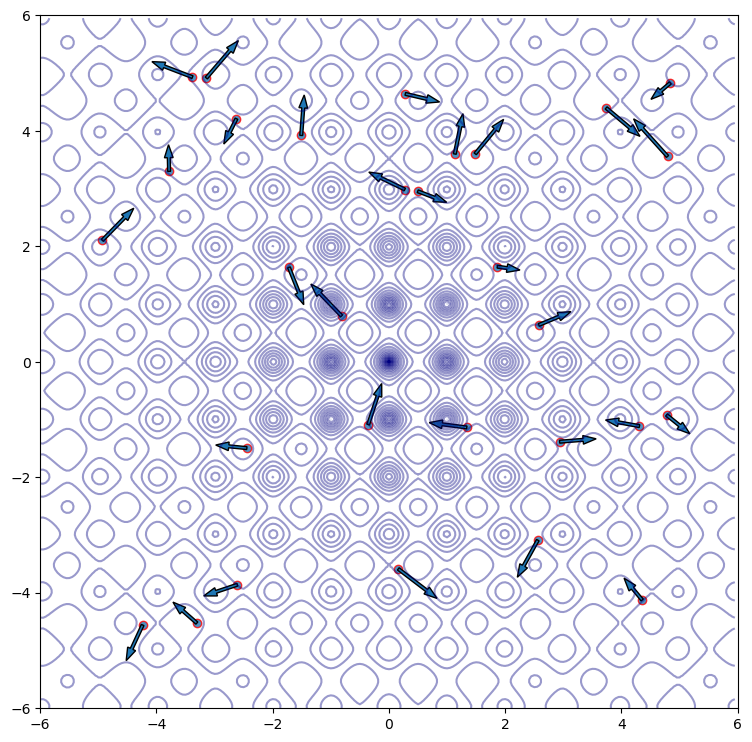

In [3]:
# whats the maximum number of generations that we should run for?
MaxGen = 50

# how many particles in our population?
NoParticles = 30

# make the particles
Particles = (np.random.rand(NoParticles,Dim) * 2.0 - 1.0) * Bounds
print("Dim of particles is")
print(Particles.shape)

# remember the best for each particle - start by thinking each particles current position is their best
IndividualBest = Particles.copy()

# velocity - just make it random and small in first step
Velocity = (np.random.rand(NoParticles,Dim) - 0.5) * (0.1 * 2*Bounds)
#Velocity = np.zeros((NoParticles,Dim))
print("Dim of velocities is")
print(Velocity.shape)

# what is global best?
GlobalBest = Particles[0,:] # start with thinking its the first particle
        
# plot and display it    marker="o",  markersize=10
fig, ax = pl.subplots(nrows = 1, ncols = 1, figsize=(9, 9))
pl.scatter(Particles[:,0], Particles[:,1], edgecolor='r', alpha=0.8)  
# draw the velocities
for i in range(NoParticles):
    pl.arrow(Particles[i,0], Particles[i,1], Velocity[i,0], Velocity[i,1], width = 0.05)        
a = np.arange(-Bounds-1, Bounds+1, ContourStepSize)
b = np.arange(-Bounds-1, Bounds+1, ContourStepSize)
x, y = np.meshgrid(a, b)
z = my_func(x, y)
pl.contour(x, y, z, levels=np.logspace(-9, 9, 150), cmap='jet', alpha=0.4)    
pl.xlim(-Bounds-1, Bounds+1)
pl.ylim(-Bounds-1, Bounds+1) 

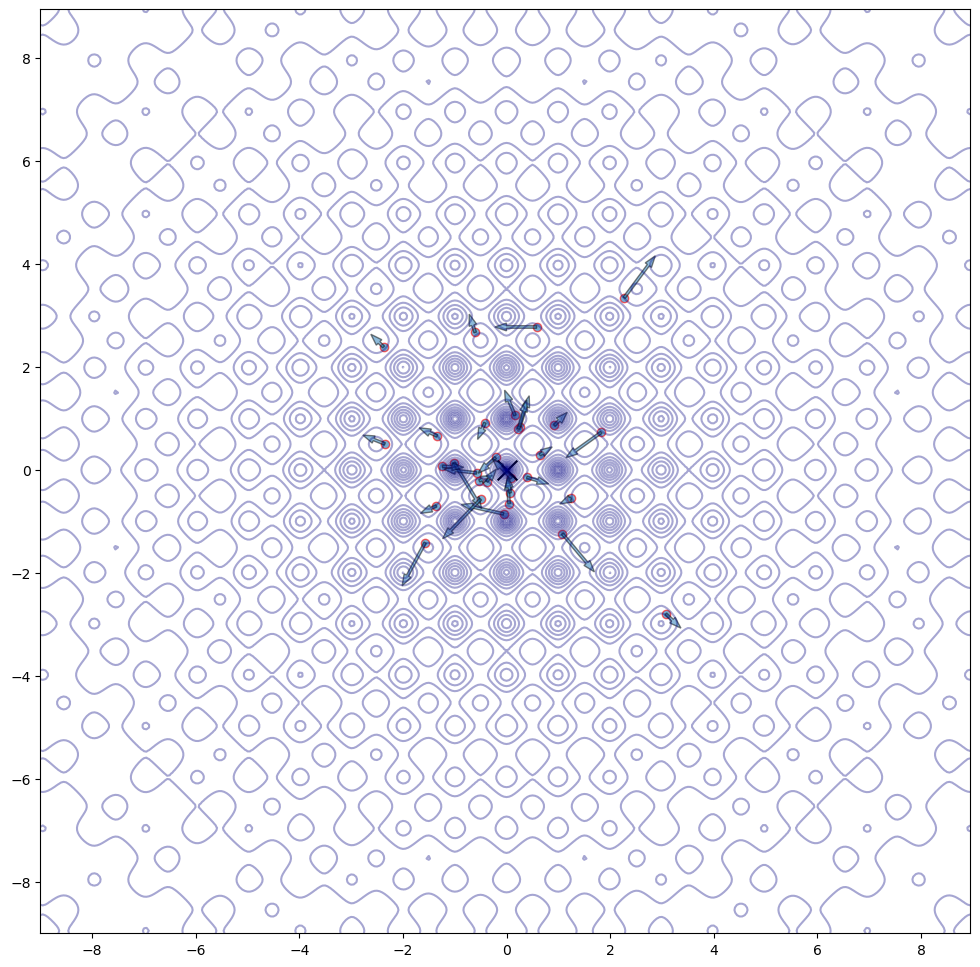

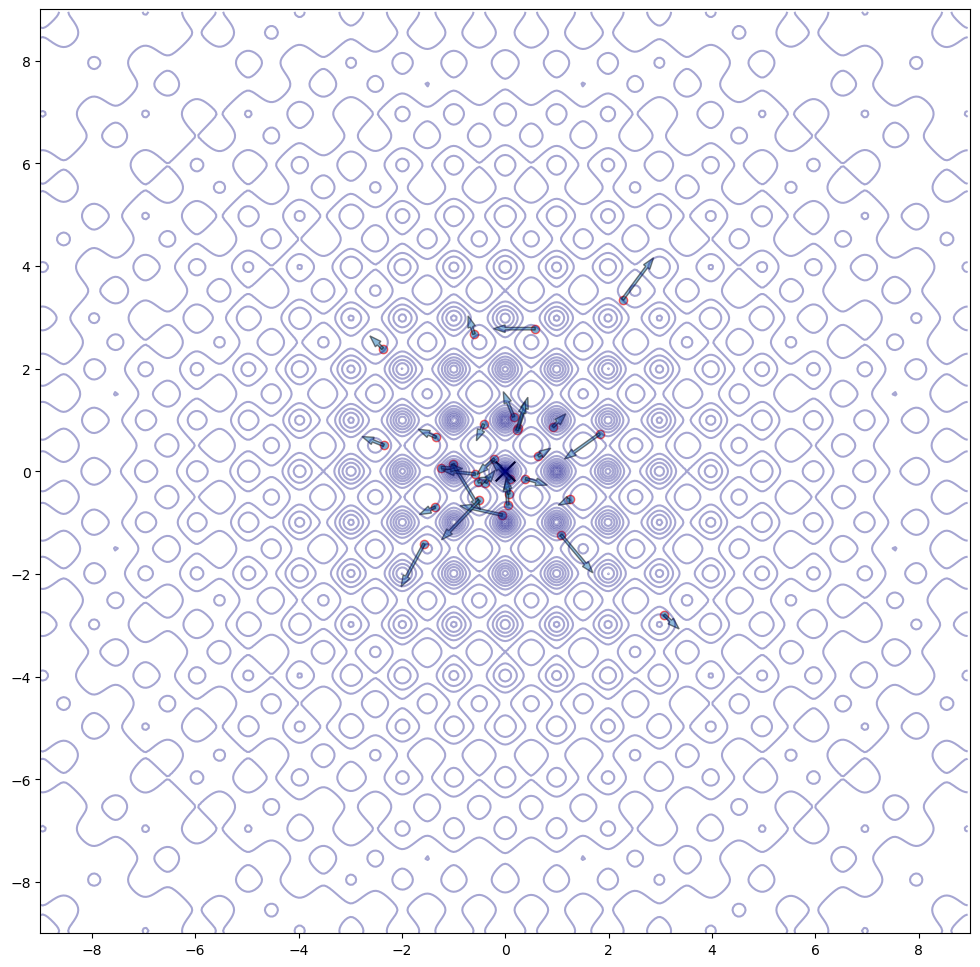

In [4]:
# cognitive and social variables
c1 = 0.2
c2 = 0.1

# update amount - you can think of this as the delta step amount - 1 means full amount and less means we slow down the updates
delta = 0.5

# remember our best positions and scores
Bests = np.zeros((MaxGen,3))
Pmean = np.zeros(MaxGen)
Pworst = np.zeros(MaxGen)
Pbest = np.zeros(MaxGen)

fig, ax = pl.subplots(nrows = 1, ncols = 1, figsize=(12, 12))
for t in range(MaxGen):    
    
    ####################################################################
    ####################################################################

    # best time
    Pscores = np.zeros(NoParticles)
    for i in range(NoParticles):
        # local best
        a = my_func(Particles[i,0],Particles[i,1])
        Pscores[i] = a
        b = my_func(IndividualBest[i,0],IndividualBest[i,1])
        c = my_func(GlobalBest[0],GlobalBest[1])
        if( a < b ):
            IndividualBest[i,:] = Particles[i,:].copy()      
        # global best
        if( a < c ):
            GlobalBest = Particles[i,:].copy()
        
    # remember these bests
    Bests[t,0:2] = GlobalBest
    Bests[t,2] = my_func(GlobalBest[0],GlobalBest[1])
      
    # get the stats
    Pmean[t] = np.mean(Pscores) 
    Pbest[t] = np.min(Pscores) 
    Pworst[t] = np.max(Pscores) 
        
    # update our particles
    for i in range(NoParticles):
        # update velocity
        Velocity[i,:] = Velocity[i,:] + (delta * c1 * np.random.rand() * (IndividualBest[i,:]-Particles[i,:])) + (delta * c2 * np.random.rand() * (GlobalBest-Particles[i,:]))
        # do any clamping?
        if( np.linalg.norm(Velocity[i,:]) > (0.1 * 2*Bounds) ):
            Velocity[i,:] = (0.1 * 2*Bounds) * (Velocity[i,:] / np.linalg.norm(Velocity[i,:]))
        # update position
        Particles[i,:] = Particles[i,:] + Velocity[i,:]
        # any clamping?
        if( Particles[i,0] < -Bounds ):
            Particles[i,0] = -Bounds
        if( Particles[i,0] > Bounds ):
            Particles[i,0] = Bounds
        if( Particles[i,1] < -Bounds ):
            Particles[i,1] = -Bounds
        if( Particles[i,1] > Bounds ):
            Particles[i,1] = Bounds
            
    ####################################################################
    ####################################################################
    
    pl.clf() 

    # plot  
    pl.scatter(Particles[:,0], Particles[:,1], edgecolor='r', alpha=0.6)  
    pl.scatter(GlobalBest[0], GlobalBest[1], edgecolor='k', color='k', alpha=1, marker="x", s=200)  
        
    # draw the velocities
    for i in range(NoParticles):
        pl.arrow(Particles[i,0], Particles[i,1], Velocity[i,0], Velocity[i,1], width = 0.05, alpha=0.5)
        
    # Himmelblau
    a = np.arange(-Bounds-4, Bounds+4, ContourStepSize)
    b = np.arange(-Bounds-4, Bounds+4, ContourStepSize)
    x, y = np.meshgrid(a, b)
    z = my_func(x, y)
    pl.contour(x, y, z, levels=np.logspace(-9, 9, 150), cmap='jet', alpha=0.35)    
    
    # animation, so pause it!
    display.clear_output(wait=True)
    display.display(pl.gcf())
    pl.xlim(-Bounds-4, Bounds+4)
    pl.ylim(-Bounds-4, Bounds+4) 
    time.sleep(0.1)  

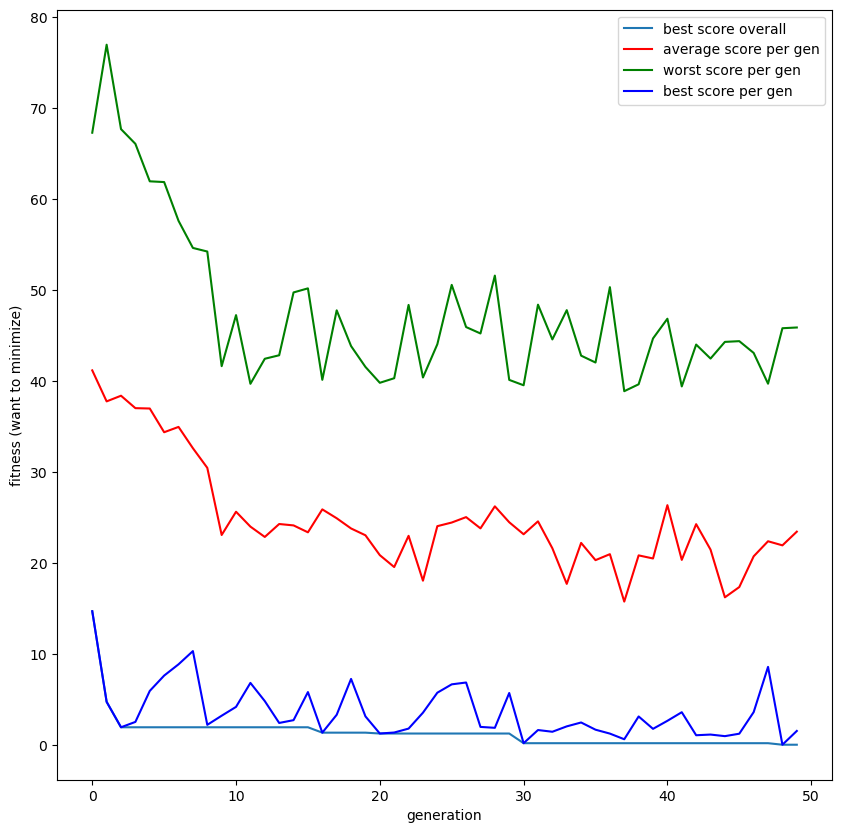

In [5]:
fig, ax = pl.subplots(nrows = 1, ncols = 1, figsize=(10,10))
plt.plot(Bests[:,2])
plt.plot(Pmean,'r')
plt.plot(Pworst,'g')
plt.plot(Pbest,'b')
ax.set_xlabel('generation')
ax.set_ylabel('fitness (want to minimize)')
ax.legend(['best score overall', 'average score per gen', 'worst score per gen', 'best score per gen'])
plt.show()